In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Gradient Boosting Classifier

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=0)

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier().fit(X_train, y_train)

In [4]:
gbrt.score(X_test, y_test)

0.9644444444444444

In [5]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {'learning_rate': np.logspace(-2, 0, 3),
              'n_estimators': [10, 100, 1000]}
param_grid

{'learning_rate': array([0.01, 0.1 , 1.  ]), 'n_estimators': [10, 100, 1000]}

In [6]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(gbrt, param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.01, 0.1 , 1.  ]),
                         'n_estimators': [10, 100, 1000]},
             return_train_score=True)

In [7]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.347666      0.001735         0.000400    4.896322e-04   
1       3.456375      0.002395         0.003791    3.974200e-04   
2      34.756389      0.053080         0.034701    3.959617e-04   
3       0.347472      0.000798         0.000997    1.784161e-07   
4       3.473322      0.008934         0.003989    1.907349e-07   
5      35.058319      0.279704         0.033310    4.891624e-04   
6       0.363562      0.008809         0.000999    3.733364e-06   
7       3.468916      0.036992         0.003397    4.969678e-04   
8      37.568055      4.918910         0.029726    2.767847e-03   

  param_learning_rate param_n_estimators  \
0                0.01                 10   
1                0.01                100   
2                0.01               1000   
3                 0.1                 10   
4                 0.1                100   
5                 0.1               1000   
6                   1                 10   
7                   1                100   
8                   1               1000   

                                          params  split0_test_score  \
0    {'learning_rate': 0.01, 'n_estimators': 10}           0.807407   
1   {'learning_rate': 0.01, 'n_estimators': 100}           0.859259   
2  {'learning_rate': 0.01, 'n_estimators': 1000}           0.959259   
3     {'learning_rate': 0.1, 'n_estimators': 10}           0.866667   
4    {'learning_rate': 0.1, 'n_estimators': 100}           0.955556   
5   {'learning_rate': 0.1, 'n_estimators': 1000}           0.970370   
6     {'learning_rate': 1.0, 'n_estimators': 10}           0.866667   
7    {'learning_rate': 1.0, 'n_estimators': 100}           0.977778   
8   {'learning_rate': 1.0, 'n_estimators': 1000}           0.959259   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.822222           0.791822  ...         0.815145        0.017328   
1           0.885185           0.881041  ...         0.887179        0.019024   
2           0.962963           0.951673  ...         0.960653        0.007657   
3           0.900000           0.881041  ...         0.888649        0.015329   
4           0.959259           0.955390  ...         0.959915        0.007185   
5           0.962963           0.959108  ...         0.965849        0.004339   
6           0.933333           0.877323  ...         0.740669        0.302415   
7           0.966667           0.955390  ...         0.959893        0.015158   
8           0.959259           0.947955  ...         0.774038        0.357330   

   rank_test_score  split0_train_score  split1_train_score  \
0                7            0.910864            0.893222   
1                6            0.970288            0.970288   
2                2            1.000000            1.000000   
3                5            0.970288            0.973073   
4                3            1.000000            1.000000   
5                1            1.000000            1.000000   
6                9            0.988858            1.000000   
7                4            1.000000            1.000000   
8                8            1.000000            1.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.889610            0.894249            0.906308   
1            0.968460            0.972171            0.968460   
2            1.000000            1.000000            1.000000   
3            0.965677            0.970315            0.966605   
4            1.000000            1.000000            1.000000   
5            1.000000            1.000000            1.000000   
6            1.000000            0.180891            0.998145   
7            1.000000            0.998145            0.996289   
8            1.000000            0.086271            0.998145   

   mean_train_score  std_train_score  
0          0.898850         0.008224  
1          0.969933

In [8]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_learning_rate', columns='param_n_estimators')
pd.set_option("display.precision",4)
res = res.set_index(res.index.values.round(4))

In [9]:
res

param_n_estimators    10      100     1000
0.01                0.8151  0.8872  0.9607
0.10                0.8886  0.9599  0.9658
1.00                0.7407  0.9599  0.7740

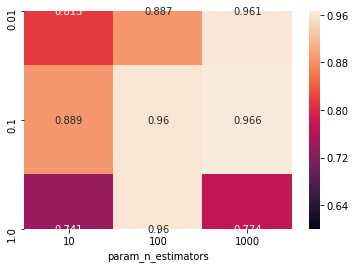

In [10]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

In [11]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [12]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
GradientBoostingClassifier(n_estimators=1000)


In [13]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.973


# XGBoost

conda install -c conda-forge xgboost

In [14]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("accuracy on training set: %f" % xgb.score(X_train, y_train))
print("accuracy on test set: %f" % xgb.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.966667


# LightGBM

conda install -c conda-forge lightgbm

In [15]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
print("accuracy on training set: %f" % lgbm.score(X_train, y_train))
print("accuracy on test set: %f" % lgbm.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.971111


# CatBoost

conda install -c conda-forge catboost

In [16]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier()
catb.fit(X_train, y_train)
print("accuracy on training set: %f" % catb.score(X_train, y_train))
print("accuracy on test set: %f" % catb.score(X_test, y_test))

Learning rate set to 0.080338
0:	learn: 2.1126983	total: 71.5ms	remaining: 1m 11s
1:	learn: 1.9358861	total: 76.1ms	remaining: 38s
2:	learn: 1.7924286	total: 80.5ms	remaining: 26.8s
3:	learn: 1.6694380	total: 85.2ms	remaining: 21.2s
4:	learn: 1.5730011	total: 90.3ms	remaining: 18s
5:	learn: 1.4647960	total: 95.7ms	remaining: 15.9s
6:	learn: 1.3817830	total: 100ms	remaining: 14.2s
7:	learn: 1.2946902	total: 105ms	remaining: 13s
8:	learn: 1.2244043	total: 110ms	remaining: 12.1s
9:	learn: 1.1624241	total: 114ms	remaining: 11.3s
10:	learn: 1.1063454	total: 119ms	remaining: 10.7s
11:	learn: 1.0549718	total: 123ms	remaining: 10.1s
12:	learn: 1.0043612	total: 128ms	remaining: 9.72s
13:	learn: 0.9601640	total: 132ms	remaining: 9.28s
14:	learn: 0.9163434	total: 136ms	remaining: 8.93s
15:	learn: 0.8795605	total: 140ms	remaining: 8.62s
16:	learn: 0.8394000	total: 144ms	remaining: 8.34s
17:	learn: 0.8074171	total: 149ms	remaining: 8.11s
18:	learn: 0.7757240	total: 152ms	remaining: 7.87s
19:	learn:

180:	learn: 0.0633616	total: 868ms	remaining: 3.93s
181:	learn: 0.0630318	total: 872ms	remaining: 3.92s
182:	learn: 0.0625887	total: 877ms	remaining: 3.91s
183:	learn: 0.0620367	total: 881ms	remaining: 3.91s
184:	learn: 0.0616076	total: 885ms	remaining: 3.9s
185:	learn: 0.0612235	total: 890ms	remaining: 3.89s
186:	learn: 0.0608375	total: 895ms	remaining: 3.89s
187:	learn: 0.0604774	total: 899ms	remaining: 3.88s
188:	learn: 0.0601839	total: 904ms	remaining: 3.88s
189:	learn: 0.0598474	total: 908ms	remaining: 3.87s
190:	learn: 0.0593151	total: 913ms	remaining: 3.87s
191:	learn: 0.0589166	total: 917ms	remaining: 3.86s
192:	learn: 0.0585568	total: 922ms	remaining: 3.86s
193:	learn: 0.0583197	total: 927ms	remaining: 3.85s
194:	learn: 0.0579211	total: 931ms	remaining: 3.84s
195:	learn: 0.0575651	total: 936ms	remaining: 3.84s
196:	learn: 0.0572546	total: 940ms	remaining: 3.83s
197:	learn: 0.0569025	total: 945ms	remaining: 3.83s
198:	learn: 0.0565246	total: 949ms	remaining: 3.82s
199:	learn: 0

378:	learn: 0.0237610	total: 1.75s	remaining: 2.87s
379:	learn: 0.0237063	total: 1.75s	remaining: 2.86s
380:	learn: 0.0235865	total: 1.76s	remaining: 2.85s
381:	learn: 0.0235307	total: 1.76s	remaining: 2.85s
382:	learn: 0.0234373	total: 1.76s	remaining: 2.84s
383:	learn: 0.0233803	total: 1.77s	remaining: 2.84s
384:	learn: 0.0232978	total: 1.77s	remaining: 2.83s
385:	learn: 0.0231954	total: 1.78s	remaining: 2.83s
386:	learn: 0.0231333	total: 1.78s	remaining: 2.82s
387:	learn: 0.0230926	total: 1.79s	remaining: 2.82s
388:	learn: 0.0230218	total: 1.79s	remaining: 2.81s
389:	learn: 0.0229674	total: 1.79s	remaining: 2.81s
390:	learn: 0.0228738	total: 1.8s	remaining: 2.8s
391:	learn: 0.0227951	total: 1.8s	remaining: 2.8s
392:	learn: 0.0227196	total: 1.81s	remaining: 2.79s
393:	learn: 0.0226584	total: 1.81s	remaining: 2.79s
394:	learn: 0.0225553	total: 1.82s	remaining: 2.78s
395:	learn: 0.0225058	total: 1.82s	remaining: 2.78s
396:	learn: 0.0224427	total: 1.82s	remaining: 2.77s
397:	learn: 0.02

542:	learn: 0.0151851	total: 2.45s	remaining: 2.06s
543:	learn: 0.0151550	total: 2.45s	remaining: 2.06s
544:	learn: 0.0151264	total: 2.46s	remaining: 2.05s
545:	learn: 0.0150942	total: 2.46s	remaining: 2.05s
546:	learn: 0.0150494	total: 2.47s	remaining: 2.04s
547:	learn: 0.0150252	total: 2.47s	remaining: 2.04s
548:	learn: 0.0149813	total: 2.47s	remaining: 2.03s
549:	learn: 0.0149513	total: 2.48s	remaining: 2.03s
550:	learn: 0.0149171	total: 2.48s	remaining: 2.02s
551:	learn: 0.0148845	total: 2.49s	remaining: 2.02s
552:	learn: 0.0148454	total: 2.49s	remaining: 2.01s
553:	learn: 0.0148091	total: 2.5s	remaining: 2.01s
554:	learn: 0.0147736	total: 2.5s	remaining: 2s
555:	learn: 0.0147252	total: 2.5s	remaining: 2s
556:	learn: 0.0147020	total: 2.51s	remaining: 1.99s
557:	learn: 0.0146718	total: 2.51s	remaining: 1.99s
558:	learn: 0.0146346	total: 2.52s	remaining: 1.98s
559:	learn: 0.0146186	total: 2.52s	remaining: 1.98s
560:	learn: 0.0145918	total: 2.52s	remaining: 1.97s
561:	learn: 0.0145596

713:	learn: 0.0107102	total: 3.16s	remaining: 1.26s
714:	learn: 0.0107011	total: 3.16s	remaining: 1.26s
715:	learn: 0.0106767	total: 3.16s	remaining: 1.25s
716:	learn: 0.0106597	total: 3.17s	remaining: 1.25s
717:	learn: 0.0106315	total: 3.17s	remaining: 1.25s
718:	learn: 0.0106102	total: 3.17s	remaining: 1.24s
719:	learn: 0.0105878	total: 3.18s	remaining: 1.24s
720:	learn: 0.0105734	total: 3.18s	remaining: 1.23s
721:	learn: 0.0105592	total: 3.19s	remaining: 1.23s
722:	learn: 0.0105345	total: 3.19s	remaining: 1.22s
723:	learn: 0.0105014	total: 3.2s	remaining: 1.22s
724:	learn: 0.0104854	total: 3.2s	remaining: 1.21s
725:	learn: 0.0104638	total: 3.21s	remaining: 1.21s
726:	learn: 0.0104450	total: 3.21s	remaining: 1.21s
727:	learn: 0.0104296	total: 3.21s	remaining: 1.2s
728:	learn: 0.0104016	total: 3.22s	remaining: 1.2s
729:	learn: 0.0103845	total: 3.22s	remaining: 1.19s
730:	learn: 0.0103677	total: 3.23s	remaining: 1.19s
731:	learn: 0.0103508	total: 3.23s	remaining: 1.18s
732:	learn: 0.01

880:	learn: 0.0082066	total: 3.86s	remaining: 521ms
881:	learn: 0.0081951	total: 3.86s	remaining: 517ms
882:	learn: 0.0081792	total: 3.87s	remaining: 512ms
883:	learn: 0.0081685	total: 3.87s	remaining: 508ms
884:	learn: 0.0081538	total: 3.87s	remaining: 503ms
885:	learn: 0.0081410	total: 3.88s	remaining: 499ms
886:	learn: 0.0081276	total: 3.88s	remaining: 494ms
887:	learn: 0.0081121	total: 3.88s	remaining: 490ms
888:	learn: 0.0081000	total: 3.89s	remaining: 486ms
889:	learn: 0.0080850	total: 3.89s	remaining: 481ms
890:	learn: 0.0080713	total: 3.9s	remaining: 477ms
891:	learn: 0.0080539	total: 3.9s	remaining: 473ms
892:	learn: 0.0080391	total: 3.91s	remaining: 468ms
893:	learn: 0.0080295	total: 3.91s	remaining: 464ms
894:	learn: 0.0080182	total: 3.92s	remaining: 459ms
895:	learn: 0.0080031	total: 3.92s	remaining: 455ms
896:	learn: 0.0079958	total: 3.92s	remaining: 451ms
897:	learn: 0.0079821	total: 3.93s	remaining: 446ms
898:	learn: 0.0079745	total: 3.93s	remaining: 442ms
899:	learn: 0.

# Gradient Boosting Regressor

In [17]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=42)

gbrt = GradientBoostingRegressor().fit(X_train, y_train)
print("Test-set score: {:.3f}".format(gbrt.score(X_test, y_test)))

Test-set score: 0.872


In [18]:
gbrt.feature_importances_

array([0.030804, 0.000124, 0.001122, 0.00064 , 0.012837, 0.40403 ,
       0.016121, 0.077995, 0.002349, 0.008247, 0.032001, 0.008557,
       0.405173])

In [19]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

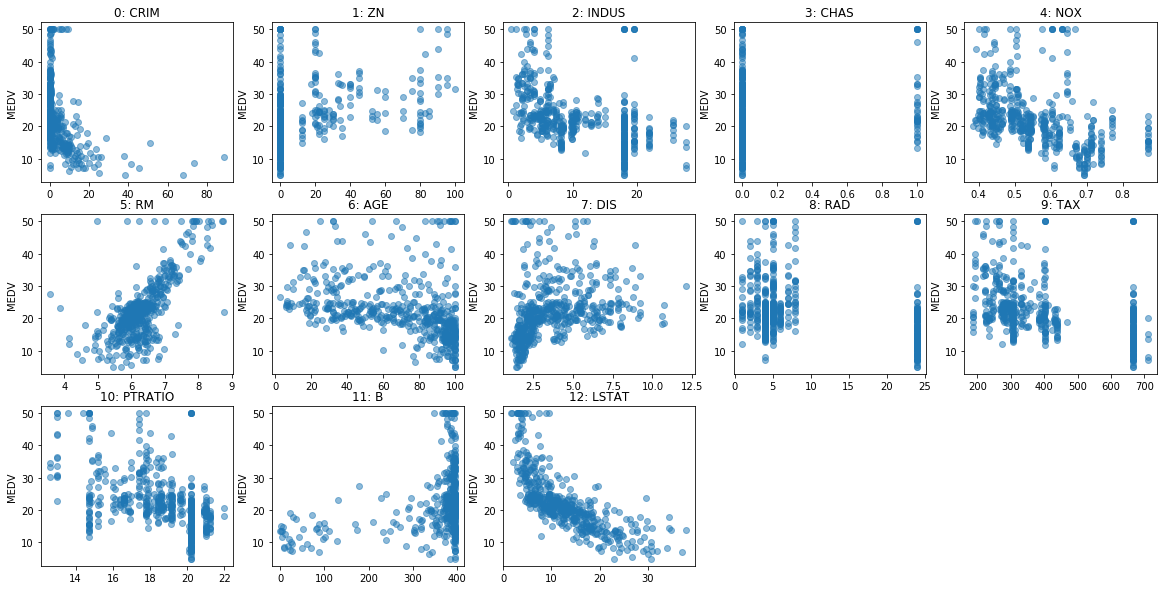

In [22]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(boston.data[:, i], boston.target, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")